In [2]:
import math

# List for all data
list_ctrl = []
list_test = []

# List for marked data (i.e. DE genes)
list_mark_ctrl = []
list_mark_test = []

# List of labeled data (i.e. the gene of interest)
list_annot_ctrl = []
list_annot_test = []
list_annot_label = []

list_annot_genes = ['HIP1R', 'LRRC4C', 'CD38', 'TMEM38A', 'PTPN11', 'TH', 'KCTD8', 'KIF5C;KIF5A', 'NEFH', 'NEFM', 'NEFL','SLC6A1']

filename_qprot = 'qprot_SNcVTA_OGA.txt_qprot_fdr100'

x_label = 'O-GlcNAc modified proteins in WT, log2(LFQ)'
y_label = 'O-GlcNAc modified proteins in OGA, log2(LFQ)'

path_list = []
f_path = open('pathway.list', 'r')
for line in f_path:
    path_list.append(line.strip())
f_path.close()

f_qprot = open(filename_qprot, 'r')
f_qprot.readline()
for line in f_qprot:
    tokens = line.strip().split("\t")
    tmp_name = tokens[-1]
    if tmp_name.startswith('0') or tmp_name.startswith('-'):
        continue
    tmp_test = float(tokens[-4])
    tmp_ctrl = float(tokens[-3])
    tmp_log2_ctrl = math.log(tmp_ctrl+0.001) / math.log(2)
    tmp_log2_test = math.log(tmp_test+0.001) / math.log(2)
    tmp_log2FC = tmp_log2_test - tmp_log2_ctrl
    tmp_FDR = float(tokens[-7])
    list_ctrl.append(tmp_log2_ctrl)
    list_test.append(tmp_log2_test)
    
    if tmp_FDR < 0.05 and abs(tmp_log2FC) > 1:
        #if tmp_log2_ctrl < 0 or tmp_log2_test < 0:
        #    print(tokens)
        
        list_mark_ctrl.append(tmp_log2_ctrl)
        list_mark_test.append(tmp_log2_test)

        #if tokens[0] in path_list:
        if tmp_name in list_annot_genes:
            list_annot_ctrl.append(tmp_log2_ctrl)
            list_annot_test.append(tmp_log2_test)
            list_annot_label.append(tmp_name)
f_qprot.close()


NEFL
NEFM
NEFH
TH
KIF5C;KIF5A
SLC6A1
PTPN11
CD38
TMEM38A
KCTD8
LRRC4C
HIP1R


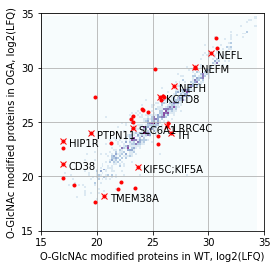

In [9]:
# Plotting
import matplotlib.pyplot as plt
import numpy as np

min_lim = 15
max_lim = 35
fig = plt.figure(figsize=(4,4))

ax1 = fig.add_subplot(1,1,1)
ax1.hist2d(list_ctrl, list_test, bins=(250, 250), cmap=plt.cm.BuPu)
ax1.plot([max(x, min_lim+2) for x in list_mark_ctrl],\
         [max(x, min_lim+2) for x in list_mark_test], 'r.')
ax1.plot([max(x, min_lim+2) for x in list_annot_ctrl],\
         [max(x, min_lim+2) for x in list_annot_test], 'rx')
tmp_i = 0
for tmp_name in list_annot_label:
    tmp_x = max(list_annot_ctrl[tmp_i], min_lim+2)
    tmp_y = max(list_annot_test[tmp_i], min_lim+2)
    ax1.annotate(tmp_name, (tmp_x, tmp_y), (tmp_x+0.5, tmp_y-0.5))
    print(tmp_name)
    tmp_i += 1

ax1.set_xlim(min_lim, max_lim)
ax1.set_ylim(min_lim, max_lim)

ax1.set_yticks(range(15,36,5))
ax1.set_xlabel(x_label)
ax1.set_ylabel(y_label)
#ax1.set_title(filename_qprot)
ax1.grid()
plt.savefig('%s.pdf' % filename_qprot)
#plt.show()
